## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

In [ ]:
# This is for continous data.
# generate some toy data:
SIZE = 20000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = np.random.normal(size=SIZE, scale = 1)
e = np.random.normal(size=SIZE, scale = 1)

f= a + b + c + d + e + np.random.normal(size=SIZE, scale = 1)
g = f + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)




In [ ]:
# let's try and predict D HERE

# This is for continous data.
# generate some toy data:
SIZE = 100000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = a + b + c + np.random.normal(size=SIZE, scale = 1)
e = d + np.random.normal(size=SIZE, scale = 1)
f= d + np.random.normal(size=SIZE, scale = 1)
g = d + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '2500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [ ]:
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
print(len(graphs))
svg_str = graphs[0].create_svg()
SVG(svg_str)

# Trying some various ML models

In [15]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pydot
from IPython.display import SVG

def gen_data():
    SIZE = 10000
    a = np.random.binomial(2, 0.5, size=SIZE)
    b = np.random.binomial(2, 0.5, size=SIZE)
    c = np.random.binomial(2, 0.5, size=SIZE)
    d = np.random.binomial(2, 0.5, size=SIZE)
    e = np.random.binomial(2, 0.5, size=SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + np.random.binomial(2, 0.5, size=SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})


import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums

def gen_data():
    SIZE = 40000
    a = discrete_gauss(-3,3, SIZE)
    b = discrete_gauss(-3,3, SIZE)
    c = discrete_gauss(-3,3, SIZE)
    d = discrete_gauss(-3,3, SIZE)
    e = discrete_gauss(-3,3, SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + discrete_gauss(-3,3, SIZE)

    #g[g < 0] = 0
    #g[g > 0] = 1
    #g[(g <= 3) & (g >= -3)] = 1
    #g[g < -3] = 0
    #g[g > 3] = 2
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data():
    #SIZE = 40000
    SIZE = 40000
    a = np.random.normal(0, 1, SIZE)
    b = np.random.normal(0, 1, SIZE)
    c = np.random.normal(0, 1, SIZE)
    d = np.random.normal(0, 1, SIZE)
    e = np.random.normal(0, 1, SIZE)
    f= a + b + c + d + e + np.random.normal(0, 1, SIZE)
    g = f + np.random.normal(0, 1, SIZE)
    g = np.rint(g)
    #m = np.mean(g)
    #g[g < m] = 0
    #g[g >= m] = 1

    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

df = gen_data()



import numpy as np
import matplotlib.pyplot as plt
def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(rotation=75)
    ax.set_xticks(ind+width, x_ax)


    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Error: LogisticRegression() 0.2613545816733068


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2147410358565737
Error: DecisionTreeClassifier() 0.27091633466135456
Error: LinearSVC() 0.2948207171314741
Error: GaussianNB() 0.3597609561752988
Violation: {'f'} {'b', 'e', 'a', 'd', 'f', 'c'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: BernoulliNB() 0.26733067729083665


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.34860557768924305
Error: RandomForestClassifier() 0.30278884462151395
Error: ExtraTreesClassifier() 0.2896414342629482
Error: AdaBoostClassifier() 0.27091633466135456
Error: BaggingClassifier() 0.3035856573705179
Error: GradientBoostingClassifier() 0.34103585657370517
Error: MLPClassifier() 0.35179282868525896
Error: LogisticRegression() 0.2762894842063175


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17752898840463815
Violation: {'f'} {'f', 'd'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: DecisionTreeClassifier() 0.2818872451019592
Error: LinearSVC() 0.29788084766093564
Error: GaussianNB() 0.3634546181527389
Violation: {'f'} {'b', 'e', 'a', 'd', 'f', 'c'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: BernoulliNB() 0.24830067972810876


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3750499800079968
Error: RandomForestClassifier() 0.29788084766093564
Error: ExtraTreesClassifier() 0.3006797281087565
Error: AdaBoostClassifier() 0.258296681327469
Error: BaggingClassifier() 0.3078768492602959
Error: GradientBoostingClassifier() 0.34106357457017195
Error: MLPClassifier() 0.3714514194322271
Error: LogisticRegression() 0.2683219863836604


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16419703644373249
Violation: {'f'} {'a', 'b'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: DecisionTreeClassifier() 0.263516219463356
Error: LinearSVC() 0.289146976371646
Error: GaussianNB() 0.3592310772927513
Violation: {'f'} {'b', 'e', 'a', 'd', 'f', 'c'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: BernoulliNB() 0.24028834601521826
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: LinearDiscriminantAnalysis() 0.3628354024829796
Error: RandomForestClassifier() 0.2867440929114938
Error: ExtraTreesClassifier() 0.29555466559871846
Error: AdaBoostClassifier() 0.27472967561073286
Error: BaggingClassifier() 0.30837004405286345
Error: GradientBoostingClassifier() 0.33079695634761713
Error: MLPClassifier() 0.35042050460552665
Error: LogisticRegression() 0.27447833065810595


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2102728731942215
Violation: {'f'} {'f', 'e', 'd'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: DecisionTreeClassifier() 0.28370786516853935
Error: LinearSVC() 0.3021669341894061
Error: GaussianNB() 0.3683788121990369
Violation: {'f'} {'b', 'e', 'a', 'd', 'f', 'c'} g <pycausal.pycausal.pycausal object at 0x7fd1281503c8>
Error: BernoulliNB() 0.24558587479935795
Error: LinearDiscriminantAnalysis() 0.3707865168539326
Error: RandomForestClassifier() 0.29935794542536115
Error: ExtraTreesClassifier() 0.3025682182985554
Error: AdaBoostClassifier() 0.2712680577849117
Error: BaggingClassifier() 0.31380417335473515
Error: GradientBoostingClassifier() 0.3342696629213483
Error: MLPClassifier() 0.3828250401284109
Violations =  [0. 3. 0. 0. 4. 1. 0. 0. 0. 0. 0. 0. 0.]
Model_name =  LogisticRegression() Violations =  0.0
Average_violations =  0.0 0.0
Accuracy =  0.27011109573034764 0.005854969593426323 MSE =  2.117482189926859 0.02399665049959431
Model_name =  P

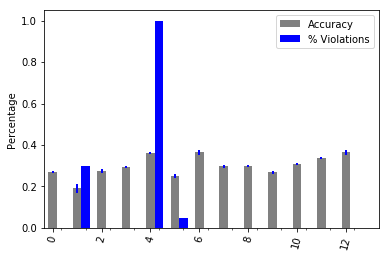

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

from pycausal import search as s

def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()
def run_models(models, model_names, x, y, num_folds=4):
    violations = np.zeros(len(models))
    violation_mean = np.zeros((len(models), num_folds))
    mean = np.zeros((len(models), num_folds))
    mean2 = np.zeros((len(models), num_folds)) # used to store our secondary metric
    
    skf = StratifiedKFold(n_splits=num_folds)
    fold = 0
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for idx, model in enumerate(models):
            model.fit(x_train, y_train)
            original_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])

            original_targets = pd.DataFrame(y_test, columns = ['g'])
            original_df = original_df.join(original_targets)
            test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
            test_df = test_df.join(test_targets)
            #print(get_MB(get_CG(test_df), 'g'))
            print("Error:", model_names[idx], accuracy_score(y_test, model.predict(x_test)))
            
            
            mean[idx][fold] = accuracy_score(y_test, model.predict(x_test))
            mean2[idx][fold] = mean_squared_error(y_test, model.predict(x_test))
            
            setA = get_MB(get_CG(original_df, tetrad), 'g', pc)
            setB = get_MB(get_CG(test_df, tetrad), 'g', pc)
            assert(setA == {'f'})
            violation_mean[idx][fold] = len(setA.difference(setB)) + len(setB.difference(setA))
            if setA != setB:
                print("Violation:", setA , setB, 'g', pc)
                violations[idx] += 1
            
            #pc.stop_vm()
        fold += 1
    
    print("Violations = ", violations)
    
    metric = []
    metric_err = []
    viol = []
    viol_err = []
    
    #normalize the violations for prettier graphing.
    #also violations are always positive, so just divide by max.
    violation_mean = violation_mean / np.max(violation_mean)
    
    for i in range(len(violations)):
        print("Model_name = ", model_names[i], "Violations = ", violations[i])
        print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
        print("Accuracy = ", np.mean(mean[i]), np.std(mean[i]), "MSE = ", np.mean(mean2[i]), np.std(mean2[i]),)
        metric.append(np.mean(mean[i]))
        metric_err.append(np.std(mean[i]))
        viol.append(np.mean(violation_mean[i]))
        
        viol_err.append(np.std(violation_mean[i]))
    print(np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))    
    
    bar_plot(model_names, 
             np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))
    return 

X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

models = [LogisticRegression(), 
          Perceptron(),  
          DecisionTreeClassifier(),
          LinearSVC(),
          GaussianNB(),
          BernoulliNB(),
          LinearDiscriminantAnalysis(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),
          BaggingClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier()
         ]
model_names = ['LogisticRegression()', 
          'Perceptron()',  
          'DecisionTreeClassifier()',
          'LinearSVC()',
          'GaussianNB()',
          'BernoulliNB()',
          'LinearDiscriminantAnalysis()',
          'RandomForestClassifier()',
          'ExtraTreesClassifier()', 
          'AdaBoostClassifier()',
          'BaggingClassifier()',
          'GradientBoostingClassifier()',
          'MLPClassifier()'
         ]

run_models(models,model_names, X,y)

In [4]:
test = []
test.append(1)